In [1]:
from matplotlib import pyplot as plt
from matplotlib import dates
from datetime import datetime
import numpy as np
import sys

# Read queries data:
f=open("all_clicks.txt","r")

query_clicks_lsi=[]
query_clicks_lda=[]
for line in f.readlines():
    tokens=line.split(' ')
    model=tokens[0]
    query_timestamp=tokens[1]+" "+tokens[2]

    if ( model == 'LSI'):
        query_clicks_lsi.append(query_timestamp)
    if ( model == 'LDA'):
        query_clicks_lda.append(query_timestamp)
f.close()

query_clicks_lsi=np.array(query_clicks_lsi,dtype='datetime64')
query_clicks_lda=np.array(query_clicks_lda,dtype='datetime64')

start_time=min(query_clicks_lsi[0],query_clicks_lda[0])
print(start_time)

2017-08-02T16:33:39


In [2]:
# Read lsi:
f=open("lsi_clicks.txt","r")

lsi_clicks=[]
for line in f.readlines():
    line=line.strip()
    if '2017' in line:
        if np.datetime64(line) >= start_time:
            lsi_clicks.append(line)
f.close()

lsi_clicks=np.array(lsi_clicks,dtype='datetime64')

# Read lda:
f=open("lda_clicks.txt","r")

lda_clicks=[]
for line in f.readlines():
    line=line.strip()
    if '2017' in line:
        if np.datetime64(line) >= start_time:
            lda_clicks.append(line)
f.close()

lda_clicks=np.array(lda_clicks,dtype='datetime64')



In [3]:
# Count clicks
count_query_lda=len(query_clicks_lda)
count_query_lsi=len(query_clicks_lsi)
count_lda_clicks=len(lda_clicks)
count_lsi_clicks=len(lsi_clicks)

# Get clicks per query
clicks_per_query_lda=count_lda_clicks/count_query_lda
clicks_per_query_lsi=count_lsi_clicks/count_query_lsi

print("Counts queries LDA: {}".format(count_query_lda))
print("Counts clicks LDA : {}".format(count_lda_clicks))
print("Counts queries LSI: {}".format(count_query_lsi))
print("Counts clicks LDA: {}".format(count_lsi_clicks))

Counts queries LDA: 9
Counts clicks LDA : 21
Counts queries LSI: 13
Counts clicks LDA: 52


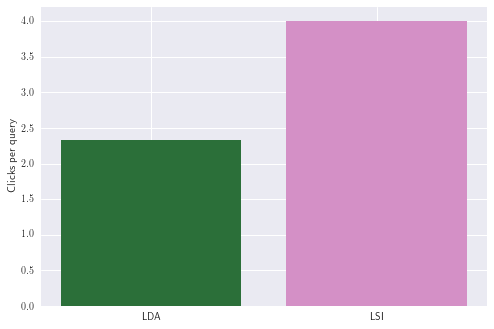

In [4]:
import seaborn as sns

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True

plt.rcParams.update({'font.size': 24})

fig, ax = plt.subplots()
#plt.subplots_adjust(left=0.2,right=1.0,bottom=0.2,top=0.9)
#fig.set_size_inches(3.3,2.6)


ind = np.arange(1, 3)
clicks_per_query=[clicks_per_query_lda,clicks_per_query_lsi]
models=["LDA","LSI"]

f1,f2 = plt.bar(ind, clicks_per_query,color=sns.color_palette("cubehelix", len(ind)))
ax.set_xticks(ind)
ax.set_xticklabels(models,rotation=0)
ax.set_ylabel('Clicks per query')

fig.facecolor="white"
plt.show()
#fig.savefig('FIG3.pdf', dpi=300)

